In [2]:
import os
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
def k_esima_raiz(a, k, c, max_iter=20, tol=1e-10, eps=1e-14):
    x = c
    seq = [x]
    for _ in range(max_iter):
        denom = x**(k - 1.0)

        if abs(denom) < eps:
            break

        x_next = 0.5 * (x + a / denom)
        seq.append(x_next)

        if abs(x_next - x) < tol * (1.0 + abs(x)):
            break

        x = x_next

    return seq

In [4]:
def convergiu(seq, a, k, tol=1e-10, residual_tol=1e-8):
    if len(seq) < 2:
        return False
    x_prev, x_last = seq[-2], seq[-1]
    passo_pequeno = abs(x_last - x_prev) < tol * (1.0 + abs(x_prev))
    residual = abs((x_last**k) - a)
    residual_ok = residual <= residual_tol * max(1.0, abs(a))
    return passo_pequeno and residual_ok

def run_experimento(a_ini, a_fim, k, c=1.0, max_iter=50, tol=1e-10, residual_tol=1e-8):
    rows = []
    for a in range(a_ini, a_fim + 1):
        seq = k_esima_raiz(a, k, c, max_iter=max_iter, tol=tol)
        x_last = seq[-1]
        residual = abs((x_last**k) - a)
        ok = convergiu(seq, a, k, tol=tol, residual_tol=residual_tol)
        rows.append({
            "a": a,
            "status": "converged" if ok else "not_converged",
            "iters": len(seq) - 1,
            "x_last": x_last,
            "residual": residual
        })
    return pd.DataFrame(rows)

def resumo_converg(df):
    total = len(df)
    conv = int((df["status"] == "converged").sum())
    rate = conv / total if total else 0.0
    return pd.Series({
        "total": total,
        "converged": conv,
        "not_converged": int((df["status"] == "not_converged").sum()),
        "taxa_converg": rate
    })

def plot_residual_log(df, k, titulo=None):
    mask = np.isfinite(df["residual"]) & (df["residual"] > 0)
    xs = df.loc[mask, "a"].to_numpy()
    ys = np.log10(df.loc[mask, "residual"].to_numpy())
    plt.figure()
    plt.scatter(xs, ys, s=1)
    plt.xlabel("a")
    plt.ylabel(f"log10(|x^{k} - a|)")
    plt.title(titulo or f"Residual final (regra 0.5*(x + a/x^(k-1))) — k={k}")
    plt.tight_layout()
    plt.show()

In [5]:
A_INI = 1
A_FIM = 300000    
C_INIT = 1.0
MAX_ITER = 100     
TOL = 1e-10
RESID_TOL = 1e-8

OUT_DIR = "resultados_incorreta"
os.makedirs(OUT_DIR, exist_ok=True)


Resumo k=2
total            300000.0
converged        300000.0
not_converged         0.0
taxa_converg          1.0
dtype: float64


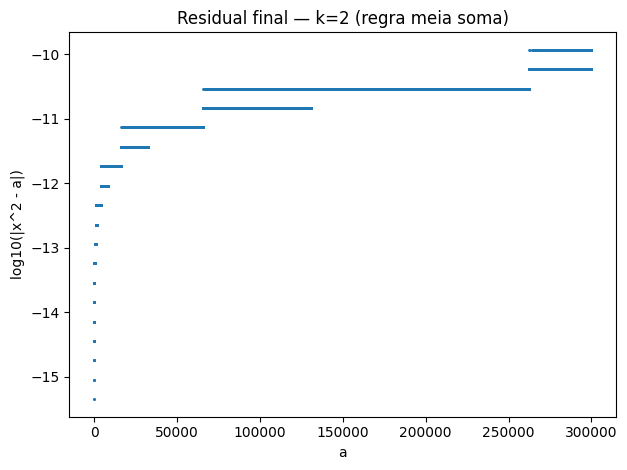

In [6]:
df_k2 = run_experimento(A_INI, A_FIM, k=2, c=C_INIT, max_iter=MAX_ITER, tol=TOL, residual_tol=RESID_TOL)
print("Resumo k=2")
print(resumo_converg(df_k2))
df_k2.to_csv(f"{OUT_DIR}/k2_results.csv", index=False)

plot_residual_log(df_k2, 2, "Residual final — k=2 (regra meia soma)")


Resumo k=3
total            300000.0
converged        300000.0
not_converged         0.0
taxa_converg          1.0
dtype: float64


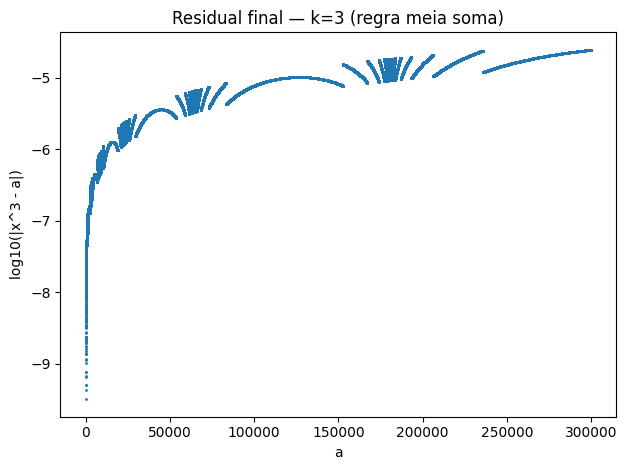

In [7]:
df_k3 = run_experimento(A_INI, A_FIM, k=3, c=C_INIT, max_iter=MAX_ITER, tol=TOL, residual_tol=RESID_TOL)
print("Resumo k=3")
print(resumo_converg(df_k3))
df_k3.to_csv(f"{OUT_DIR}/k3_results.csv", index=False)

plot_residual_log(df_k3, 3, "Residual final — k=3 (regra meia soma)")


Resumo k=3
total            300000.0
converged        300000.0
not_converged         0.0
taxa_converg          1.0
dtype: float64


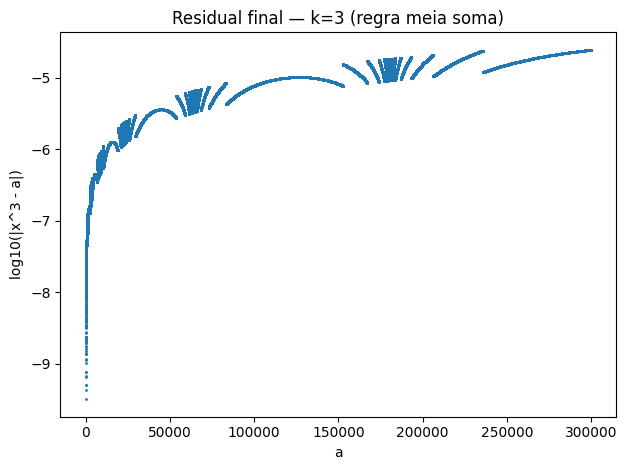

In [8]:
df_k3 = run_experimento(A_INI, A_FIM, k=3, c=C_INIT, max_iter=MAX_ITER, tol=TOL, residual_tol=RESID_TOL)
print("Resumo k=3")
print(resumo_converg(df_k3))
df_k3.to_csv(f"{OUT_DIR}/k3_results.csv", index=False)

plot_residual_log(df_k3, 3, "Residual final — k=3 (regra meia soma)")


Resumo k=4
total            300000.000000
converged             1.000000
not_converged    299999.000000
taxa_converg          0.000003
dtype: float64


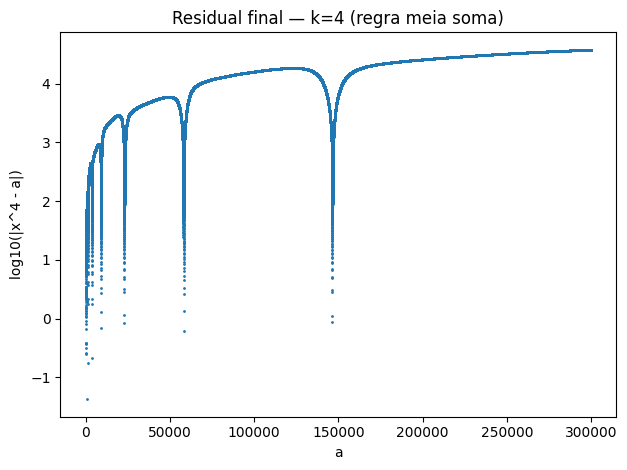

In [9]:
df_k4 = run_experimento(A_INI, A_FIM, k=4, c=C_INIT, max_iter=MAX_ITER, tol=TOL, residual_tol=RESID_TOL)
print("Resumo k=4")
print(resumo_converg(df_k4))
df_k4.to_csv(f"{OUT_DIR}/k4_results.csv", index=False)

plot_residual_log(df_k4, 4, "Residual final — k=4 (regra meia soma)")


Resumo k=5
total            300000.000000
converged             1.000000
not_converged    299999.000000
taxa_converg          0.000003
dtype: float64


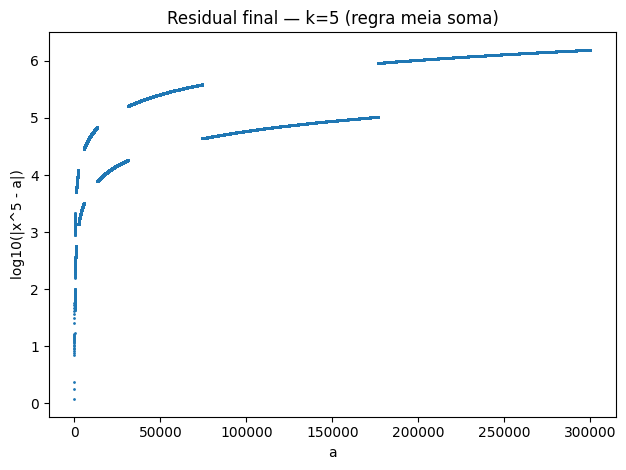

In [10]:
df_k5 = run_experimento(A_INI, A_FIM, k=5, c=C_INIT, max_iter=MAX_ITER, tol=TOL, residual_tol=RESID_TOL)
print("Resumo k=5")
print(resumo_converg(df_k5))
df_k5.to_csv(f"{OUT_DIR}/k5_results.csv", index=False)

plot_residual_log(df_k5, 5, "Residual final — k=5 (regra meia soma)")


   k  taxa_converg  converged  not_converged     total
0  2      1.000000   300000.0            0.0  300000.0
1  3      1.000000   300000.0            0.0  300000.0
2  4      0.000003        1.0       299999.0  300000.0
3  5      0.000003        1.0       299999.0  300000.0


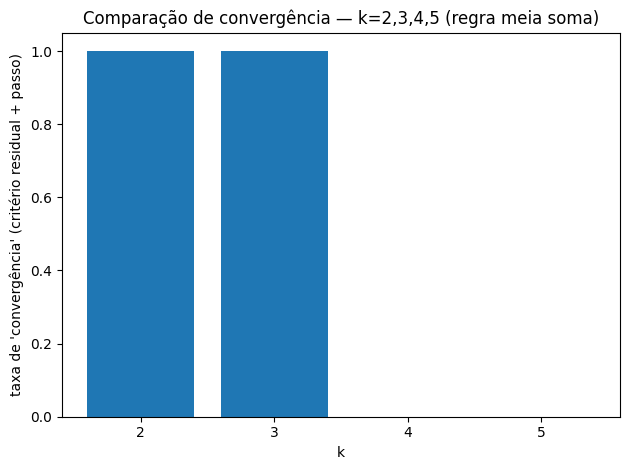

In [11]:
comparacao = pd.DataFrame({
    "k": [2,3,4,5],
    "taxa_converg": [
        resumo_converg(df_k2)["taxa_converg"],
        resumo_converg(df_k3)["taxa_converg"],
        resumo_converg(df_k4)["taxa_converg"],
        resumo_converg(df_k5)["taxa_converg"],
    ],
    "converged": [
        resumo_converg(df_k2)["converged"],
        resumo_converg(df_k3)["converged"],
        resumo_converg(df_k4)["converged"],
        resumo_converg(df_k5)["converged"],
    ],
    "not_converged": [
        resumo_converg(df_k2)["not_converged"],
        resumo_converg(df_k3)["not_converged"],
        resumo_converg(df_k4)["not_converged"],
        resumo_converg(df_k5)["not_converged"],
    ],
    "total": [
        resumo_converg(df_k2)["total"],
        resumo_converg(df_k3)["total"],
        resumo_converg(df_k4)["total"],
        resumo_converg(df_k5)["total"],
    ],
})
print(comparacao)

plt.figure()
plt.bar(comparacao["k"].astype(str).to_numpy(), comparacao["taxa_converg"].to_numpy())
plt.xlabel("k")
plt.ylabel("taxa de 'convergência' (critério residual + passo)")
plt.title("Comparação de convergência — k=2,3,4,5 (regra meia soma)")
plt.tight_layout()
plt.show()


In [13]:
def amostras_nao_converg(df, k, n=10):
    print(f"\nAmostra k={k} — não convergentes:")
    print(df[df["status"] == "not_converged"].head(n))

amostras_nao_converg(df_k2, 2)
amostras_nao_converg(df_k3, 3)
amostras_nao_converg(df_k4, 4)
amostras_nao_converg(df_k5, 5)


Amostra k=2 — não convergentes:
Empty DataFrame
Columns: [a, status, iters, x_last, residual]
Index: []

Amostra k=3 — não convergentes:
Empty DataFrame
Columns: [a, status, iters, x_last, residual]
Index: []

Amostra k=4 — não convergentes:
     a         status  iters    x_last  residual
1    2  not_converged    100  1.150562  0.247573
2    3  not_converged    100  1.273895  0.366489
3    4  not_converged    100  1.384985  0.320576
4    5  not_converged    100  1.542996  0.668389
5    6  not_converged    100  1.621025  0.904916
6    7  not_converged    100  1.685469  1.070184
7    8  not_converged    100  1.742703  1.223445
8    9  not_converged    100  1.794347  1.366355
9   10  not_converged    100  1.840909  1.484956
10  11  not_converged    100  1.881113  1.521587

Amostra k=5 — não convergentes:
     a         status  iters    x_last   residual
1    2  not_converged    100  0.960682   1.181725
2    3  not_converged    100  1.041833   1.772589
3    4  not_converged    100  1.103